In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import sympy as sp

from sympy.plotting import plot
from sympy import Symbol
from sympy import Matrix
from sympy import *
from scipy.spatial import ConvexHull
from __future__ import division

In [2]:
#read datafiles
#df = pd.read_csv('./numerical_continuation_activeset.csv')
#df_F = pd.read_csv('./numerical_continuation_F_lower.csv')
#df_G = pd.read_csv('./numerical_continuation_G_lower.csv')
df = pd.read_csv('./Nonlinear.csv')
#df

In [56]:
#Boundary

#find upper-bound
#df_upper = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','power']].groupby(by='zeta',as_index=False).max()
#df_upper

#find lower-bound
df_upper = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','power']].groupby(by='zeta',as_index=False).min()
df_upper

,zeta,omega_ratio,solution_1,solution_2,solution_3,power
0,0.01,1.00,1.000001,8.240000e-07,8.240000e-07,-6.460000e-19
1,0.02,0.99,0.997550,-2.500309e-03,8.240000e-07,-9.600000e-19
2,0.03,0.99,0.998461,-1.337880e-03,-3.817600e-04,-1.330000e-18
3,0.04,0.98,0.994844,-7.307210e-04,-5.822150e-04,-2.160000e-19
4,0.05,0.98,0.995842,-6.716921e-03,8.240000e-07,-3.180000e-19
...,...,...,...,...,...,...
95,0.96,0.64,0.895391,-7.289866e-02,-1.586142e-02,-1.100000e-17
96,0.97,0.53,0.756182,-7.118184e-02,-1.603361e-02,-1.630000e-07
97,0.98,0.70,0.939292,-7.430430e-02,-1.596495e-02,-4.090000e-18
98,0.99,0.69,0.935996,-1.013436e-01,-1.585064e-02,-3.740000e-18


In [58]:
#allocate values
zeta = np.array(df_upper.zeta,np.double)
OR = np.array(df_upper.omega_ratio,np.double)
a1 = np.array(df_upper.solution_1,np.double)
a2 = np.array(df_upper.solution_2,np.float64)
a3 = np.array(df_upper.solution_3,np.float64)

lower = (zeta + (1-OR))*100
lower_index = [round(x) for x in lower]
#lower_index

In [44]:
#boundary F G
lower_F = df_F.iloc[lower_index]
lower_G = df_G.iloc[lower_index]

lower_F = np.array(lower_F,np.double)
lower_G = np.array(lower_G,np.double)
lower_F

array([[ 0.00000000e+00,  1.25789805e-02,  2.51559695e-02, ...,
        -2.51559695e-02, -1.25789805e-02, -4.89872849e-16],
       [ 0.00000000e+00,  1.25789805e-02,  2.51559695e-02, ...,
        -2.51559695e-02, -1.25789805e-02, -4.89872849e-16],
       [ 0.00000000e+00,  1.24521673e-02,  2.49030179e-02, ...,
        -2.49030179e-02, -1.24521673e-02, -4.71231553e-16],
       ...,
       [ 0.00000000e+00,  1.24564255e-02,  2.49116334e-02, ...,
        -2.49116334e-02, -1.24564255e-02, -4.66468148e-16],
       [ 0.00000000e+00,  1.22249739e-02,  2.44508047e-02, ...,
        -2.44508047e-02, -1.22249739e-02, -4.67725642e-16],
       [ 0.00000000e+00,  1.15429103e-02,  2.30862259e-02, ...,
        -2.30862259e-02, -1.15429103e-02, -9.80424426e-16]])

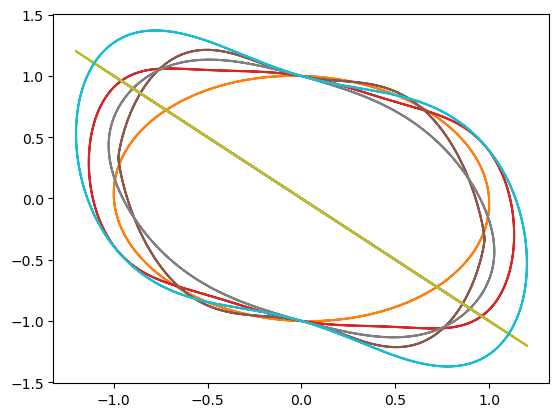

In [66]:
for i in [0,29,49,69,89]:
    xt = lower_F[i]
    F = -lower_F[i]
    G = lower_G[i]
    plt.plot(xt,F)
    plt.plot(xt,G)
    #plt.plot(xt,G-F)
plt.show()

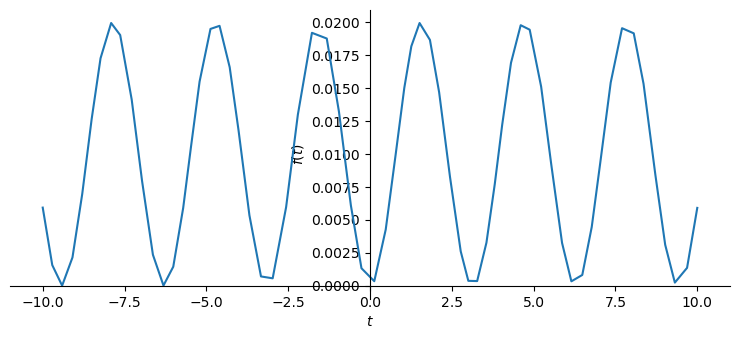

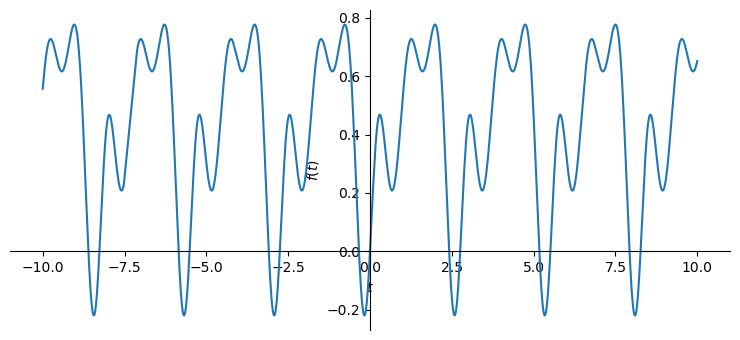

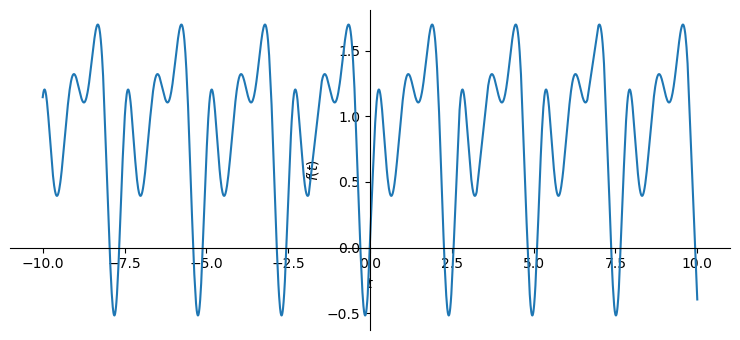

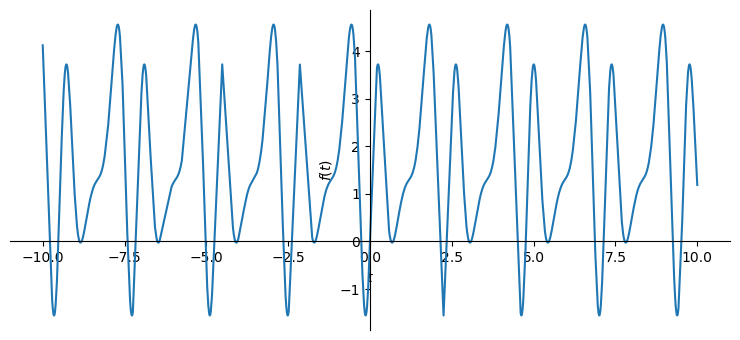

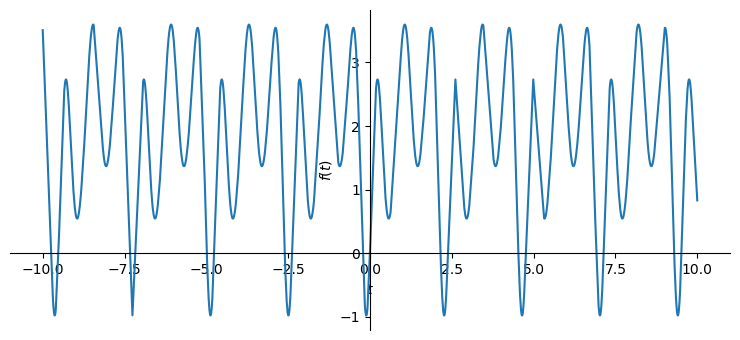

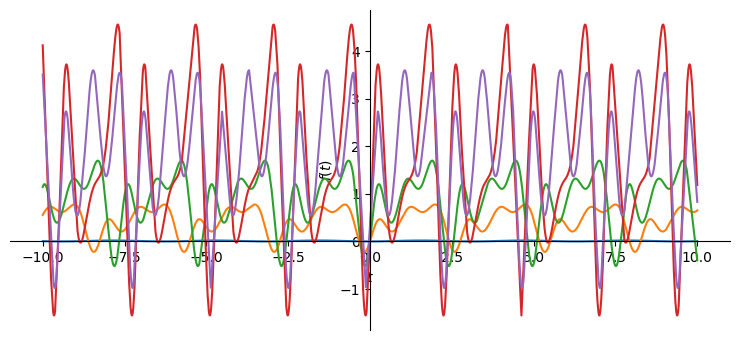

In [238]:
#Calculate work-loop using Symbolic library

t = Symbol('t')
index = len(zeta)
m = 3

for i in [0,29,49,69,89]:
    xt = a1[i] * cos(OR[i] * t) + a2[i] * cos(3 * OR[i] * t) + a3[i] * cos(5 * OR[i] * t)
    dxt = -a1[i] * OR[i] * sin(OR[i] * t) - 3 * a2[i] * OR[i] * sin(3 * OR[i] * t) - 5 * a3[i] * OR[i] * sin(5 * OR[i] * t)
    ddxt = -a1[i] * OR[i] * OR[i] * cos(OR[i] * t) - a2[i] * 9 * OR[i] * OR[i] *  cos(3 * OR[i] * t) - a3[i] *25 * OR[i] * OR[i] * cos(5 * OR[i] * t)
    
    G = ddxt + 2 * zeta[i] * dxt
    F = - xt
    Loop = G-F
    power = Loop * dxt
    
    if i == 0 :
        #Loop1 = plot_parametric((xt,G),(xt,F))
        #Loop1 = plot_parametric((xt,Loop))
        power1 = plot(power)
    else:
        #Loop2 = plot_parametric((xt,G),(xt,F))
        #Loop1.extend(Loop2)
        #Loop2 = plot_parametric((xt,Loop))
        #Loop1.extend(Loop2)
        power2 = plot(power)
        power1.extend(power2)

#Loop1.show()
power1.show()


In [5]:
#Calculate Work-loop

#Boundary

#find upper-bound
df_upper = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','solution_4','solution_5','solution_6', 'power']].groupby(by='zeta',as_index=False).max()
#df_upper

#find lower-bound
df_lower = df[['zeta','omega_ratio','solution_1','solution_2','solution_3','solution_4','solution_5','solution_6','power']].groupby(by='zeta',as_index=False).min()
#df_lower

#allocate values
zeta = np.array(df_upper.zeta,np.float64)
OR = np.array(df_upper.omega_ratio,np.float64)
a1 = np.array(df_upper.solution_1,np.float64)
a2 = np.array(df_upper.solution_2,np.float64)
a3 = np.array(df_upper.solution_3,np.float64)
a4 = np.array(df_upper.solution_4,np.float64)
a5 = np.array(df_upper.solution_5,np.float64)
a6 = np.array(df_upper.solution_6,np.float64)

def x(zeta,OR,a1,a2,a3,a4,a5,a6):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    xt = a1 * np.cos(OR * t) + a2 * np.cos(3 * OR * t) + a3 * np.cos(5 * OR * t) + a4 * np.cos(7 * OR * t) + a5 * np.cos(9 * OR * t) + a6 * np.cos(11 * OR * t)
    return xt

def dx(zeta,OR,a1,a2,a3,a4,a5,a6):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    dxt = -a1 * OR * np.sin(OR * t) - 3 * a2 * OR * np.sin(3 * OR * t) - 5 * a3 * OR * np.sin(5 * OR * t) - 7 * a4 * np.sin(7 * OR * t) - 9 * a5 * np.sin(9 * OR * t) - 11 * a6 * np.sin(11 * OR * t)
    return dxt

def ddx(zeta,OR,a1,a2,a3,a4,a5,a6):
    t = np.linspace(0,2 * np.pi/OR,1000) 
    ddxt = -a1 * OR * OR * np.cos(OR * t) - a2 * 9 * OR * OR *  np.cos(3 * OR * t) - a3 *25 * OR * OR * np.cos(5 * OR * t) -  a4 * 49 * OR * np.cos(7 * OR * t) - a5 * 81 * OR * np.cos(9 * OR * t) - a6 * 121 * OR * np.cos(11 * OR * t)
    return ddxt
    

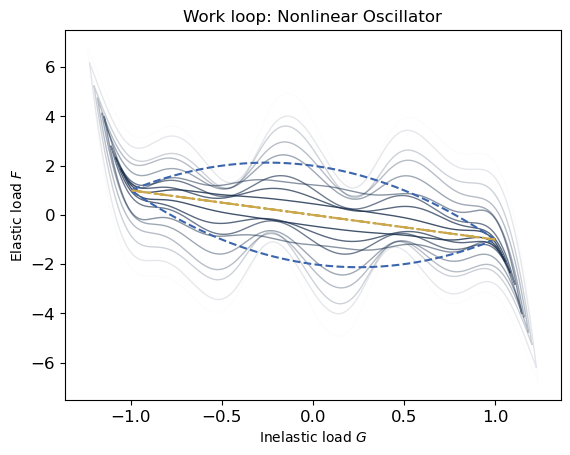

In [13]:
#Plot
index = len(zeta)

for i in [19,29,39,49,59,69,79,89,99]:
    xt = x(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])
    dxt = dx(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])
    ddxt = ddx(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])

    G = ddxt + 2 * zeta [i] * dxt * abs(dxt)
    F = - xt
    
    #plt.plot(xt,G-F)
    plt.plot(xt,G,c= "#172c4b",alpha=1-0.01 * i, linewidth=1,linestyle = '-')
    #plt.plot(xt,F,c= "#cba74e",alpha=1-0.01, linewidth=1.5,linestyle = '-.')   
    
xt = x(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])
dxt = dx(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])
ddxt = ddx(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])

G = ddxt + 2 * zeta [i] * dxt * abs(dxt)
F = - xt
    
#plt.plot(xt,G-F)
plt.plot(xt,G,c= "#3b65ac",alpha=1, linewidth=1.5,linestyle = '--')
plt.plot(xt,F,c= "#cba74e",alpha=1, linewidth=1.5,linestyle = '-.')   

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel( r"Inelastic load $G$")
plt.ylabel(r"Elastic load $F$")
plt.title('Work loop: Nonlinear Oscillator')
plt.savefig('workloop-Nonlinear(2).svg',format='svg',dpi=600)
plt.show()

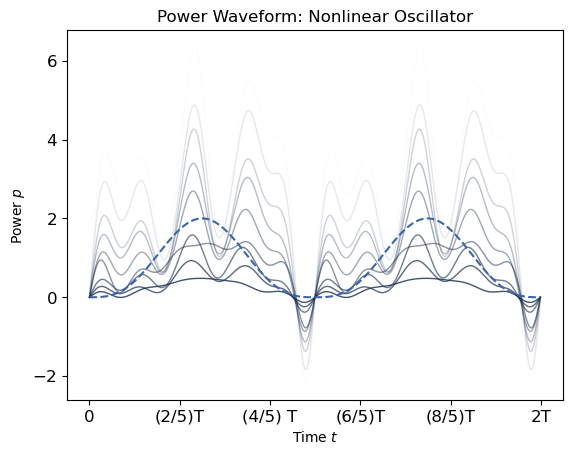

In [29]:
for i in [19,29,39,49,59,69,79,89,99]:
    xt = x(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])
    dxt = dx(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])
    ddxt = ddx(zeta[i],OR[i],a1[i],a2[i],a3[i],a4[i],a5[i],a6[i])

    G = ddxt + 2 * zeta [i] * dxt * abs(dxt)
    F = - xt
    power = (G-F) * dxt
    plt.plot(power,c= "#172c4b",alpha=1-0.01 * i, linewidth=1,linestyle = '-')
    
xt = x(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])
dxt = dx(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])
ddxt = ddx(zeta[0],OR[0],a1[0],a2[0],a3[0],a4[0],a5[0],a6[0])

G = ddxt + 2 * zeta [i] * dxt * abs(dxt)
F = - xt
power = (G-F) * dxt
plt.plot(power,c= "#3b65ac",alpha=1, linewidth=1.5,linestyle = '--')

ax = plt.gca()
plt.xticks([0, 200, 400, 600, 800, 1000],['0', '(2/5)T', '(4/5) T', '(6/5)T', '(8/5)T','2T'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel( r"Time $t$")
plt.ylabel(r"Power $p$")
plt.title('Power Waveform: Nonlinear Oscillator')
plt.savefig('power-Nonlinear.svg',format='svg',dpi=600)
plt.show()